# Customer Segmentation Analysis  --- RFM analysis

## Background

Company runs retail business, and its customers come from all over the world. In this project, we will use FRM analysis to get a deeper knowledge of our customers, therefore lauching targeted marketing campaigns.

## 1. Data loading and Preprocessing

### 1.1 data loading

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.shape

(541909, 8)

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010/12/1 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010/12/1 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010/12/1 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010/12/1 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010/12/1 8:26,3.39,17850.0,United Kingdom


### 1.2 data preprocessing

#### 1.2.1 missing value

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 22.7+ MB


·CustomerID: there are many missing values, and the orders of these are meaningless, so we delete them.\
·CustomerID: it is float64, so we should change it to string.\
·Description: there are some missing values, but it does not influence analysis, so we can fill them with 'Nah'\
·InvoiceNo: it is obeject, which means the invoice number consists numbers and string\
·InvoiceDate: it is object, so we should change it to datetime. 

In [6]:
data.dropna(subset=['CustomerID'],inplace = True)

In [7]:
data['CustomerID'] = data['CustomerID'].astype(np.int32)

In [8]:
data['Description'].fillna('Nah', inplace = True)

In [9]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int32         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 20.2+ MB


#### 1.2.2 outlier 

In [11]:
# stastical information
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


<AxesSubplot:xlabel='UnitPrice', ylabel='Density'>

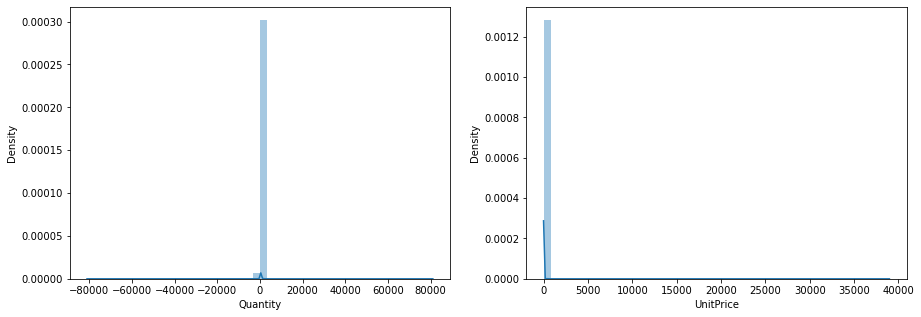

In [12]:
# data distribution
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
sns.distplot(data["Quantity"], ax=ax[0])
sns.distplot(data["UnitPrice"], ax=ax[1])

<AxesSubplot:ylabel='UnitPrice'>

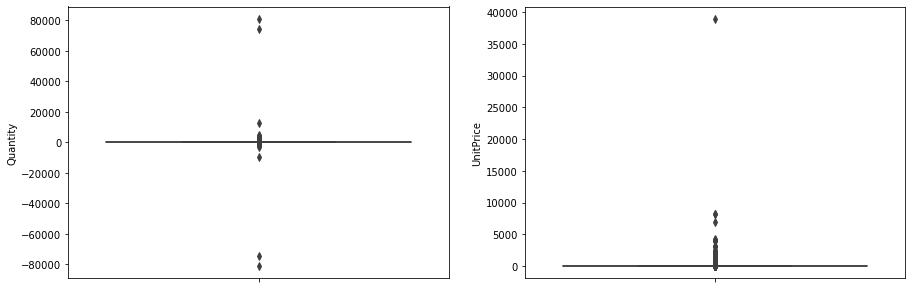

In [13]:
# boxplot
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15,5)
sns.boxplot(y="Quantity", data=data, ax=ax[0])
sns.boxplot(y="UnitPrice",data=data, ax=ax[1])

#### 1.2.3 duplicates

In [14]:
data.duplicated().sum()

5225

In [15]:
data[data.duplicated(keep=False)].sort_values(by=["InvoiceNo", "StockCode"]).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908,United Kingdom


In [16]:
data.drop_duplicates(inplace=True)

In [17]:
data.shape

(401604, 8)

## 2. RFM Model

### 2.1 calculate monetary

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

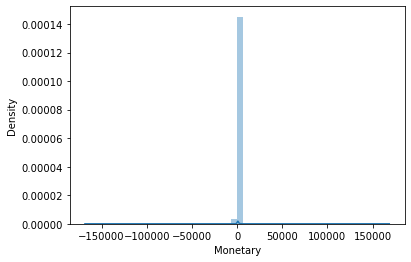

In [18]:
data['Monetary'] = data['Quantity'] * data['UnitPrice']
sns.distplot(data["Monetary"])

### 2.2  Recency

In [19]:
rfm = pd.DataFrame()
g = data.groupby("CustomerID")
current_date = pd.to_datetime("2012-01-01 00:00:00")

In [20]:
def build_R(group_data, current_date):
    # exclude returned orders
    ods_wto_r = group_data[~group_data['InvoiceNo'].str.startswith('C')]
    # if the orders of customer are all returned, then regard the earliest purchase date of the data as the last purchase date
    if len(ods_wto_r) == 0:
        date_diff = current_date - data["InvoiceDate"].min()
    else:
    # calculate the gap between the current date and the last order date of each customer
        date_diff = current_date - ods_wto_r["InvoiceDate"].max()
    return date_diff.days

In [21]:
rfm['Recency'] = g.apply(build_R,current_date)

In [22]:
rfm.head()

,Recency
CustomerID,
12346,347
12347,24
12348,97
12349,40
12350,332


### 2.3 Frequency

In [23]:
def build_F(group_data):
    # check if the order is refund
    is_refund = group_data['InvoiceNo'].str.startswith('C')
    # acquire all nornal and refund records
    normal = group_data[~is_refund]
    refund = group_data[is_refund]
    # normal orders - refund orders =  all orders of a customer
    num = normal["InvoiceNo"].unique().shape[0] - refund["InvoiceNo"].unique().shape[0]
    # if orders number < 0, it means a custimer did not have any order during the given period, so we regard the orders number as 0
    return num if num>0 else 0

In [24]:
rfm["Frequency"] = g.apply(build_F)

In [25]:
rfm.head()

,Recency,Frequency
CustomerID,,
12346,347,0
12347,24,7
12348,97,4
12349,40,1
12350,332,1


### 2.4 Monetary

In [26]:
def build_M(group_data):
    money = group_data['Monetary'].sum()
    # if sum money < 0, it means a customer did not spend money during the period given, so we regard the total money as 0
    return money if money>0 else 0

In [27]:
rfm['Monetary'] = g.apply(build_M)

In [28]:
rfm.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12346,347,0,0.00
12347,24,7,4310.00
12348,97,4,1797.24
12349,40,1,1757.55
12350,332,1,334.40
12352,58,5,1545.41
12353,226,1,89.00
12354,254,1,1079.40
12355,236,1,459.40


### 2.5 Evaluate customer level

At this point, we have the values for Recency, Frequency and Monetary parameters. Each customer will get a note between 1 and 5 for each parameter.\
We can do this by setting ranges based on expected behavior. For example, to rate Recency, we could use this scale:\
1: 0-30 days\
2: 31-60 days\
3: 61-90 days\
4: 91-180 days\
5: 181-365 days\

In [29]:
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([0.2, 0.4, 0.6, 0.8]).to_dict()

In [30]:
quintiles

{'Recency': {0.2: 36.0, 0.4: 54.40000000000009, 0.6: 94.0, 0.8: 206.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 2.0, 0.8: 4.0},
 'Monetary': {0.2: 232.50400000000002,
  0.4: 463.53999999999996,
  0.6: 903.2279999999998,
  0.8: 1994.0640000000003}}

In [31]:
# assign ranks from 1 to 5. A smaller Recency value is better whereas higher Frequency and Monetary values are better.
def r_score(x):
    if x<= quintiles['Recency'][0.2]:
        return 5
    elif x<=quintiles['Recency'][0.4]:
        return 4
    elif x<=quintiles['Recency'][0.6]:
        return 3
    elif x<=quintiles['Recency'][0.8]:
        return 2
    else:
        return 1

def f_score(x):
    if x<= quintiles['Frequency'][0.2]:
        return 1
    elif x<=quintiles['Frequency'][0.4]:
        return 2
    elif x<=quintiles['Frequency'][0.6]:
        return 3
    elif x<=quintiles['Frequency'][0.8]:
        return 4
    else:
        return 5

def m_score(x):
    if x<= quintiles['Monetary'][0.2]:
        return 1
    elif x<=quintiles['Monetary'][0.4]:
        return 2
    elif x<=quintiles['Monetary'][0.6]:
        return 3
    elif x<=quintiles['Monetary'][0.8]:
        return 4
    else:
        return 5

In [32]:
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: f_score(x))
rfm['M'] = rfm['Monetary'].apply(lambda x: m_score(x))

In [33]:
# combine the R,F,M scores into a RFM Score
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)

In [34]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM Score
CustomerID,,,,,,,
12346,347,0,0.00,1,1,1,111
12347,24,7,4310.00,5,5,5,555
12348,97,4,1797.24,2,4,4,244
12349,40,1,1757.55,4,1,4,414
12350,332,1,334.40,1,1,2,112


Description of segments:
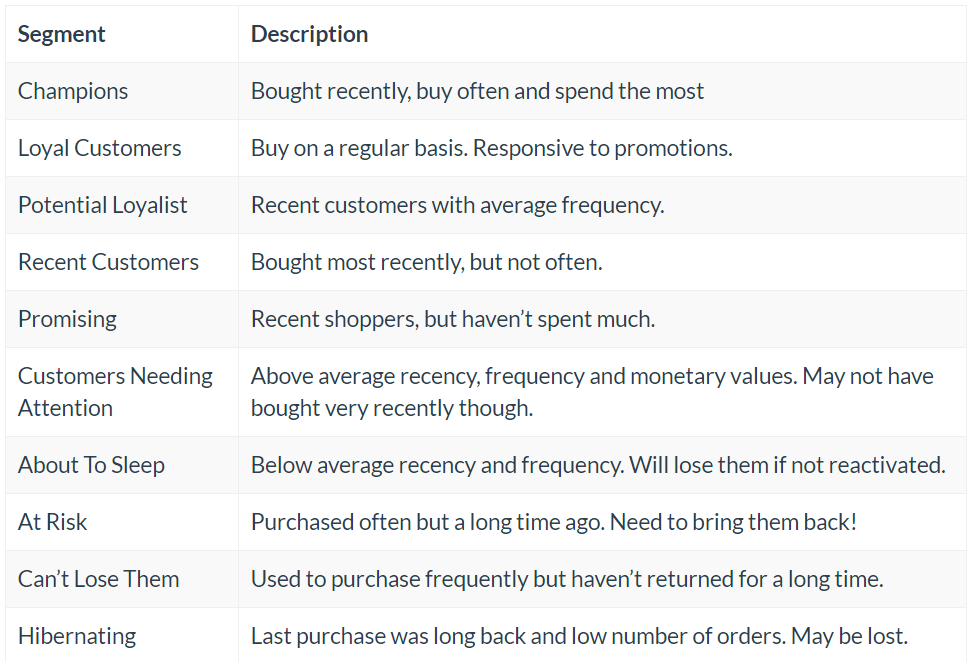

In [35]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': "can't loose",
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

In [36]:
rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
12346,347,0,0.00,1,1,1,111,hibernating
12347,24,7,4310.00,5,5,5,555,champions
12348,97,4,1797.24,2,4,4,244,at risk
12349,40,1,1757.55,4,1,4,414,promising
12350,332,1,334.40,1,1,2,112,hibernating


In [37]:
rfm = rfm.reset_index()

In [38]:
rfm

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
0,12346,347,0,0.00,1,1,1,111,hibernating
1,12347,24,7,4310.00,5,5,5,555,champions
2,12348,97,4,1797.24,2,4,4,244,at risk
3,12349,40,1,1757.55,4,1,4,414,promising
4,12350,332,1,334.40,1,1,2,112,hibernating
...,...,...,...,...,...,...,...,...,...
4367,18280,299,1,180.60,1,1,1,111,hibernating
4368,18281,202,1,80.82,2,1,1,211,hibernating
4369,18282,29,1,176.60,5,1,1,511,new customers
4370,18283,25,16,2045.53,5,5,5,555,champions


In [39]:
rfm.to_csv("rfm.csv", index=False)

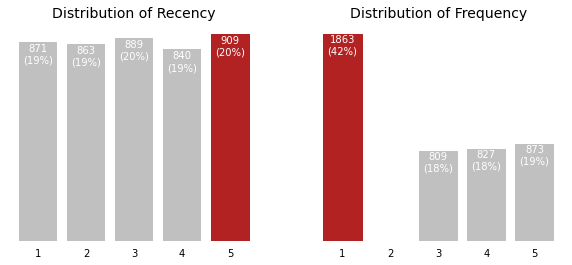

In [40]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

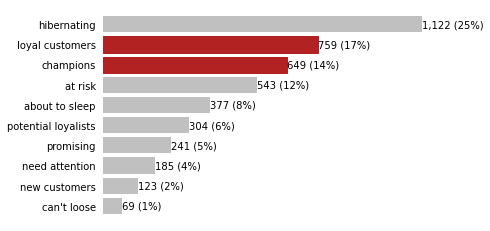

In [41]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

We have a lot of customers who don't buy frequently from us (25% are hibernating). However, 31% of our customers are either champions or loyal customers.